#Modelo de colas (Sistema de línea de espera con un servidor)

In [ ]:
# Definiendo librerías
import random as rnd
import math as m
import numpy as np
import matplotlib.pyplot as plt

###Algortimo de nosotros con distribución EXPONENCIAL para la generación del tiempo de los eventos (atención al cliente)

In [ ]:
#Declarando listas
tllegadas = [] #tiempo llegada de los usuarios 
tintrallegadas = [] #tiempo llegada entre cada usuario
Xp=[] #tiempo que demora en atender al usuario
duracion=[] #tiempo total dentro del banco por persona
ss=[] #tiempo que sale la persona


#Definiendo parametros
s=0 #tiempos de salidas
n=480 #tiempo máximo en que dura abierto el servidor (480 min = 8 horas)
lda1 = 0.008 # llegadas de personas por segundo (28 personas/hora)
lda2 = 0.008 # duración de atención de la persona por segundo
t=0 #tiempo acumulado de las intra-llegadas
i=0 #número de personas atendidas


while s<=n:
  x1 = - ((1/lda1)*m.log(rnd.random())) #Generando aleatorios con distribución EXPONENCIAL: tiempo entre llegadas
  x2 = - ((1/lda2)*m.log(rnd.random())) #Generando aleatorios con distribución EXPONENCIAL: tiempo de eventos (atención al cliente)
  t = t + x1
  tllegadas.append(t/60)
  tintrallegadas.append(x1/60)
  Xp.append(x2/60)
  if s==0:
    s = tintrallegadas[i] + Xp[i]
  else:
    if tllegadas[i]<=s:
      s = s + Xp[i]
    else:
      s = tllegadas[i] + Xp[i]
  d = s - tllegadas[i]

  duracion.append(d)
  ss.append(s)
  
  i=i+1

#se elimina la última pesona y los tiempos que le corresponden ya que el tiempo de salida sobrepasa el límite
i=i-1
duracion.pop(-1)
ss.pop(-1)
tllegadas.pop(-1)
tintrallegadas.pop(-1)
Xp.pop(-1)

espera=[]
for i in range(0,len(duracion)):
  if (Xp[i]*0.95)<duracion[i]<(Xp[i]*1.05):
    num=0
  else:
    num=duracion[i]-Xp[i]
  espera.append(num)

print('Tiempo entre llegadas (minutos)',tintrallegadas)
print('Tiempo de atención (minutos)',Xp)
print('Tiempo total - Parada (tiempoSalida < 480 minutos): ', ss[-1])

print('\nTiempo de salida por persona (minutos): ', ss)
print('Tiempo de llegada (minutos)',tllegadas)

print('\nDuración dentro del banco por persona: ',duracion)
print('Tiempo de espera en la cola por persona: ',espera)

print('\nCantidad de personas atendidas: ',i)
print('Cantidad de personas en promedio atendidas en una hora: ',i/(n/60))

Tiempo entre llegadas (minutos) [1.0130763694663012, 1.8496726994215178, 2.4549197758926606, 7.5749835419853415, 3.4641432509148515, 0.9498972322632784, 1.6761815359607595, 0.9414135943480358, 0.9257553309623372, 0.8901891287347737, 8.499550171953294, 3.304108072460024, 4.6206351444659495, 0.08928831524886043, 2.039599026729156, 0.08211116454557622, 4.037356313598514, 1.1160229432971753, 0.8018396122865095, 3.0664817867542338, 1.7449676251826725, 1.7601219369575531, 2.1646433729870265, 0.8586226895460933, 4.5412926677279195, 1.2454038134519243, 1.0888458892076514, 1.4956203504862053, 0.7655273628833865, 1.140759050916362, 0.2561021283359857, 0.33737989918840483, 2.126604573089603, 0.09599755667590368, 1.0038043788612638, 1.1624286437151659, 1.1215460115644538, 0.9537016690066399, 1.4766334065053879, 3.0556051973705936, 0.24939223672744848, 0.5360238003433062, 0.465567159982533, 0.26643605943628723, 9.48607960876447, 0.15298343817447646, 2.780342683489955, 0.3940084136409951, 1.38901866

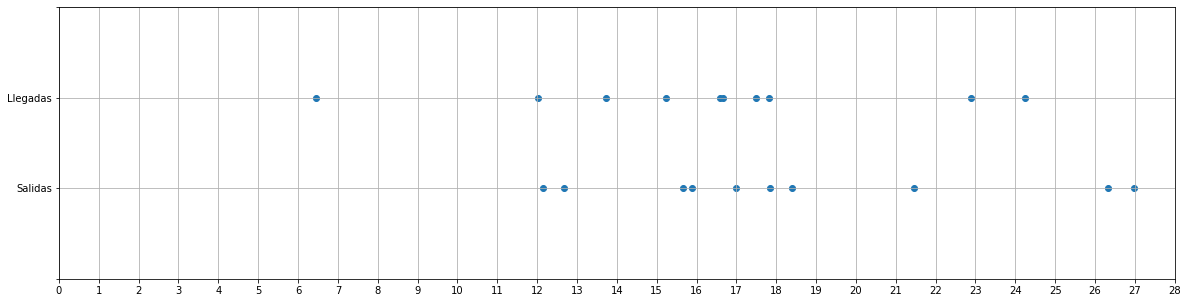

In [ ]:
fig , ax1 = plt.subplots(figsize=(20,5))
y = [np.ones(len(tllegadas[:10]))*2, np.ones(len(ss[:10]))*1]
x = [tllegadas[:10], ss[:10]]
ax1.scatter(x, y)

ax1.set_yticks(np.arange(0, 4, 1))
labels = (['','Salidas','Llegadas',''])
ax1.set_yticklabels(labels)

ax1.set_xticks(np.arange(0, np.max(x)+2, 1))

plt.grid()
fig.show()

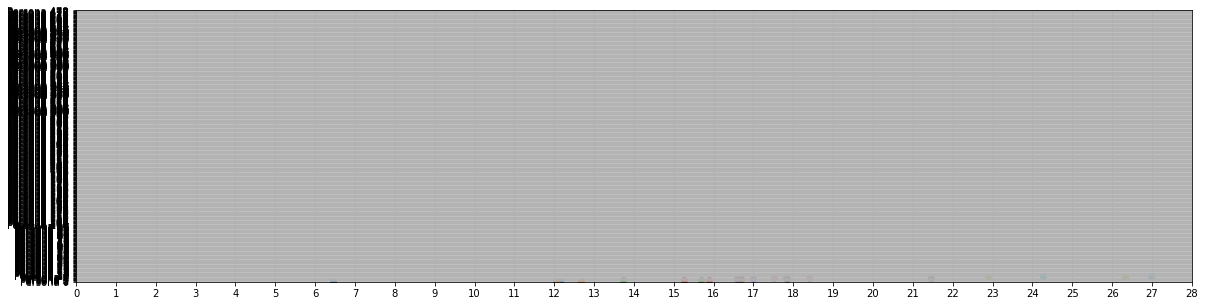

In [ ]:
inicio=0
fin=10

fig , ax1 = plt.subplots(figsize=(20,5))
for i in range(inicio,fin):
  x = [tllegadas[i], ss[i]]
  y=[i,i]
  ax1.scatter(x, y)

ax1.set_yticks(np.arange(0, n+2, 1))
labels = ("Persona {}".format(n) for n in range(0, n))
ax1.set_yticklabels(labels)

time=[tllegadas[inicio:fin], ss[inicio:fin]]
ax1.set_xticks(np.arange(0, np.max(time)+2, 1))

plt.grid()
fig.show()

###Algortimo de nosotros con distribución NORMAL para la generación del tiempo de los eventos (atención al cliente)

In [ ]:
#Declarando listas
tllegadas = []
tintrallegadas = []
Xp=[]
duracion=[]
ss=[]
estadistica=[]
#Definiendo parametros
s=0 #tiempos de salidas
n=480 #tiempo máximo en que dura abierto el servidor (480 min = 8 horas)
lda1 = 0.008 # llegadas de personas por segundo (28 personas/hora)
t=0 #tiempo acumulado de las intra-llegadas
i=0 #número de personas atendidas
while s<n:
  x1 = - ((1/lda1)*m.log(rnd.random())) #Generando aleatorios con distribución EXPONENCIAL: tiempo entre llegadas
  x2 = abs(rnd.normalvariate(2,1))  #Generando aleatorios con distribución NORMAL: tiempo de eventos (atención al cliente) - media 2 y desviación estándar 1
  t = t + x1
  tllegadas.append(t/60)
  tintrallegadas.append(x1/60)
  Xp.append(x2)
  if s==0:
    s = tintrallegadas[i] + Xp[i]
  else:
    if tllegadas[i]<=s:
      s = s + Xp[i]
    else:
      s = tllegadas[i] + Xp[i]
  d = s - tllegadas[i]

  duracion.append(d)
  ss.append(s)
  
  i=i+1

#se elimina la última pesona y los tiempos que le corresponden ya que el tiempo de salida sobrepasa el límite
i=i-1
duracion.pop(-1)
ss.pop(-1)
tllegadas.pop(-1)
tintrallegadas.pop(-1)
Xp.pop(-1)

espera=[]
for i in range(0,len(duracion)):
  if (Xp[i]*0.95)<duracion[i]<(Xp[i]*1.05):
    num=0
  else:
    num=duracion[i]-Xp[i]
  espera.append(num)

print('Tiempo entre llegadas (minutos)',tintrallegadas)
print('Tiempo de atención (minutos)',Xp)
print('Tiempo total - Parada (tiempoSalida < 480 minutos): ', ss[-1])

print('\nTiempo de salida por persona (minutos): ', ss)
print('Tiempo de llegada (minutos)',tllegadas)

print('\nDuración dentro del banco por persona: ',duracion)
print('Tiempo de espera en la cola por persona: ',espera)

print('\nCantidad de personas atendidas: ',i)
print('Cantidad de personas en promedio atendidas en una hora: ',i/(n/60))

Tiempo entre llegadas (minutos) [3.2845345272922364, 0.48380100003770043, 0.19715387679542318, 1.4868106599593882, 3.9442379547116153, 0.5024694414789355, 0.1726221017873411, 6.437231275301714, 0.09661955153103281, 2.788647793233623, 3.485412077363047, 1.2610524749284835, 0.5901926517998646, 2.7227130788806333, 5.794236617270383, 0.9494787758161297, 4.4590812280842345, 11.502351714411294, 4.739672691880425, 0.6408470165900634, 0.4300848345392369, 0.01849122395579646, 0.0468895070264912, 1.511968505920092, 1.208208851967309, 0.8610502105643913, 4.002261366549889, 1.797069411986248, 2.5106511363226494, 4.992941685185561, 0.331884346493657, 8.100718222494061, 2.039452294358783, 2.240913797646579, 11.565304587656755, 1.195010597324819, 0.029531336028299868, 1.8990239437623138, 0.9222515262830551, 0.6358772312433544, 1.875660861232786, 0.2656069105857182, 0.7230679527939454, 0.9064185092038131, 0.6695802238165528, 1.8396578007994822, 1.0541312676587287, 0.2374781469034382, 7.160441190941033

###Algortimo propuesto en el libro

In [ ]:
#Parámetros de las distribuciones exponenciales:
lda1 = 0.008 # llegadas de personas por segundo
lda2 = 0.008 # duración de atención de la persona por segundo

t=0 #Tiempo
Na=0 #Número de llegadas hasta el instante t
Nd=0 #Número de salidas hasta el instante t
n=0 #Número de clientes en el sistema en el instante t

A={} #contiene ta: hora de la siguiente llegada
D={} #contiene td: hora de salida del cliente actual

T=480 #Tiempo en el que se cierra el negocio

To=- ((1/lda1)*m.log(rnd.random()))
ta=To #tiempo de la primera llegada en segundos

td=1000000000

if ta<=td and ta<=T:
  t=ta
  Na=Na+1
  n=n+1
  X=- ((1/lda1)*m.log(rnd.random()))
  ta= X
  A[Na]=t
  Y=- ((1/lda2)*m.log(rnd.random()))
  td=t+Y

elif td<ta and td<=T:
  t=td
  